# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [1]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.55372866 2.92562138 2.33599871 2.05753423 2.79164608 2.55658236
 2.69627929 2.02500632 2.96872114 2.43717846]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [5]:
# your code here
x = uniform.rvs(size=100)
a = 10
b = 15
randoms1  = a + (b-a)*x
print(randoms1)

[12.41808231 12.49518593 13.12112972 14.72445591 12.26897647 12.83935707
 10.3358386  10.1871944  10.90267763 13.6410699  12.46683792 10.51005733
 12.92567635 14.23729946 14.78286973 13.88578335 12.47482241 11.09798853
 13.04307982 13.73075519 11.8930402  13.30634555 10.35704713 11.14143289
 12.62781589 14.18744769 11.6254451  12.83261231 13.61462791 10.69386953
 14.23652557 13.22207094 10.82790952 12.66039992 11.55363916 14.86141629
 13.03161127 14.25277715 14.47429311 12.24565056 11.74550805 12.09690007
 14.78382236 13.06604758 14.01922538 14.38550251 12.19856161 12.11192025
 14.89157614 12.75098628 11.02853561 11.67977374 11.00348653 10.44608621
 11.66495173 11.31029807 14.52687083 12.54998371 10.57748994 10.5238822
 12.51999743 10.37947151 12.40659818 12.93218201 12.33913751 10.95314826
 10.44213751 10.75811416 11.87459086 12.6503172  10.69763091 10.37571585
 14.67471796 13.05636773 11.28600977 11.21614538 10.88808113 13.61595051
 10.20586769 12.55303496 10.51633412 12.30787071 12.

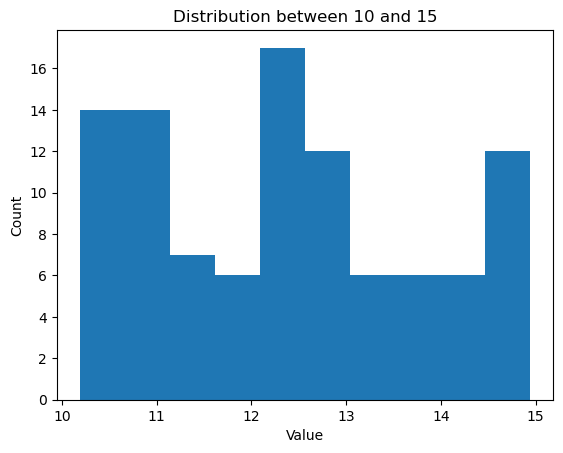

In [10]:
import matplotlib.pyplot as plt
plt.hist(randoms1, bins=10)
plt.title('Distribution between 10 and 15')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [8]:
x = uniform.rvs(size=1000)
a = 10
b = 60
randoms2  = a + (b-a)*x
print(randoms2)

[41.55940641 29.85593786 34.8826451  39.02756091 13.32476314 52.0687567
 29.39908527 29.52241237 54.23825991 39.26331705 20.33218935 35.99395036
 38.73669106 22.10312147 47.10778558 54.28038069 24.04542216 50.51424551
 41.60216947 35.79618928 36.02647126 41.98269081 42.87530078 29.14761069
 27.02679607 59.82170926 40.64282825 29.71230463 22.07342978 48.91426049
 40.9763664  38.35258136 41.32643639 30.62477508 28.1158899  37.69077333
 53.87948939 11.13531805 32.07745826 34.59934469 15.69226653 51.15188116
 38.3787407  23.3732858  40.62003097 35.7399731  19.23909486 33.22864892
 57.39620812 36.07024048 21.34170779 56.23321795 40.08965841 27.39398523
 26.27078444 19.70829901 10.73202543 55.59669685 33.68935998 26.34016341
 12.36261135 36.65128356 44.93948422 30.80160913 46.03104577 17.89144209
 44.12553295 24.22656287 59.03983112 15.40021158 34.70728394 49.65370362
 41.72524977 11.31828177 43.76638175 11.32336504 49.2201497  20.95818281
 43.21184561 35.50015328 47.61265558 11.56659478 55.

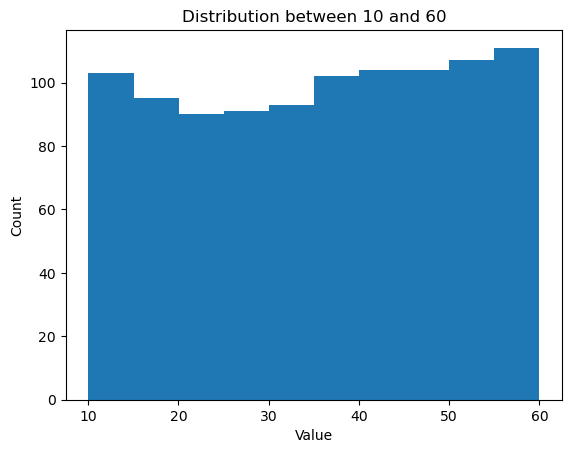

In [14]:
plt.hist(randoms2, bins=10)
plt.title('Distribution between 10 and 60')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

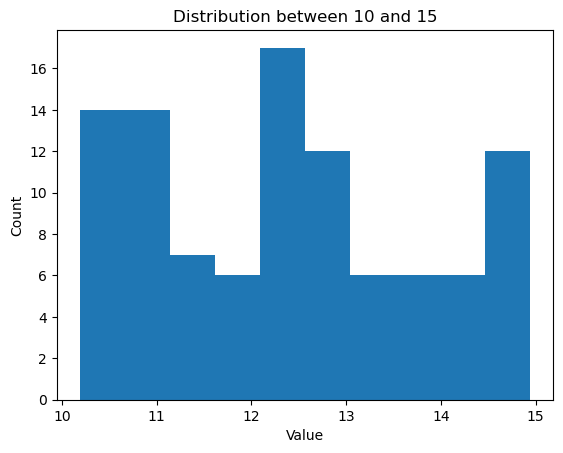

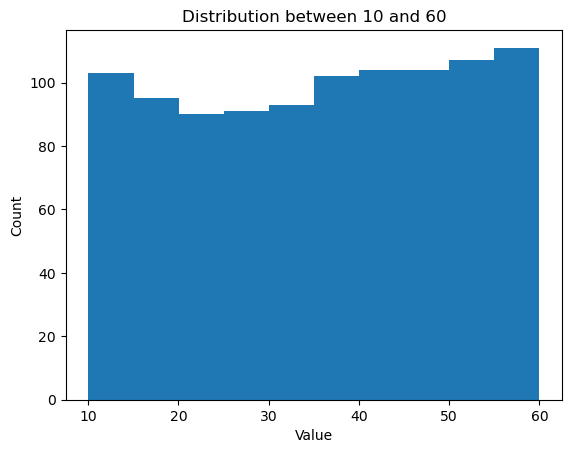

In [15]:
plt.hist(randoms1, bins=10)
plt.title('Distribution between 10 and 15')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

plt.hist(randoms2, bins=10)
plt.title('Distribution between 10 and 60')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

How are the two distributions different?

In [ ]:
# your answer here:


## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

In [16]:
# your code here
import numpy as np
import matplotlib.pyplot as plt

def generate_normal_numbers(mean, std_dev, count):
    return np.random.normal(mean, std_dev, count)


How are the two distributions different?

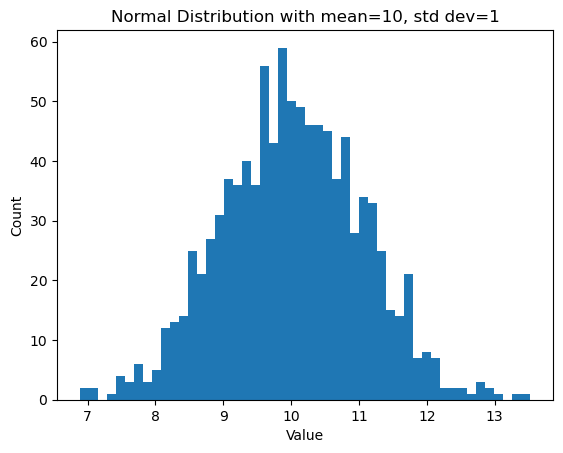

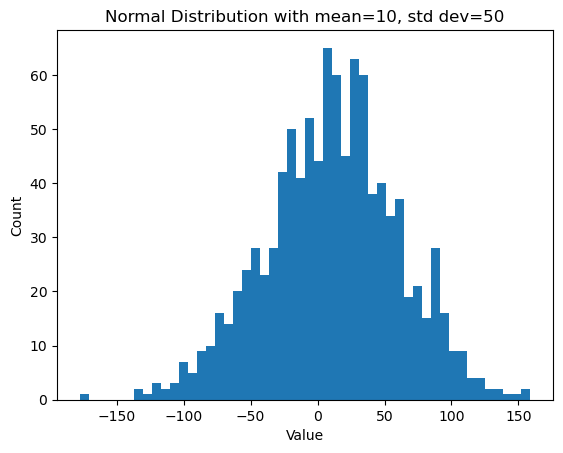

In [17]:
randoms1 = generate_normal_numbers(10, 1, 1000)
randoms2 = generate_normal_numbers(10, 50, 1000)


plt.hist(randoms1, bins=50)
plt.title('Normal Distribution with mean=10, std dev=1')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

plt.hist(randoms2, bins=50)
plt.title('Normal Distribution with mean=10, std dev=50')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()


In [ ]:
# your answer here:
"""The two normal distributions generated in the previous example have the same mean of 10,
but different standard deviations: one with a standard deviation of 1, and the other with a standard deviation
of 50.

The standard deviation is a measure of the spread of a distribution, so the larger the standard deviation, 
the more spread out the distribution will be. In this case, the distribution with a standard deviation of 50 
will have much wider tails and more spread out values compared to the distribution with a standard deviation
of 1.

In other words, the distribution with a standard deviation of 50 is much more variable than the distribution
with a standard deviation of 1. This can be seen in the histograms: the first histogram is tall and narrow, 
indicating that the values are tightly clustered around the mean of 10, while the second histogram is wider
and flatter, indicating that the values are more spread out.

Therefore, the two distributions are different in terms of their variability or spread, with the second 
distribution being much more spread out than the first one."""

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

In [21]:
# your code here
import pandas as pd
df = pd.read_csv('/Users/ricardomendes/Desktop/LABS/Week5/lab-probability-distributions/your-code/vehicles.csv')
df.head(10)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
5,Acura,2.2CL/3.0CL,1997,2.2,4.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,14.982273,20,26,22,403.954545,1500
6,Acura,2.2CL/3.0CL,1997,2.2,4.0,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,Regular,13.733750,22,28,24,370.291667,1400
7,Acura,2.2CL/3.0CL,1997,3.0,6.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,16.480500,18,26,20,444.350000,1650
8,Acura,2.3CL/3.0CL,1998,2.3,4.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,14.982273,19,27,22,403.954545,1500
9,Acura,2.3CL/3.0CL,1998,2.3,4.0,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,Regular,13.733750,21,29,24,370.291667,1400


2. CO2 Emission Grams/Mile 

In [ ]:
# your code here


3. Combined MPG

In [ ]:
# your code here


Which one(s) of the variables are nearly normally distributed? How do you know?

In [ ]:
# you answer here:


## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with a mean of 1 and 100 and a size of 1000.

1. Plot the distributions as histograms with the number of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

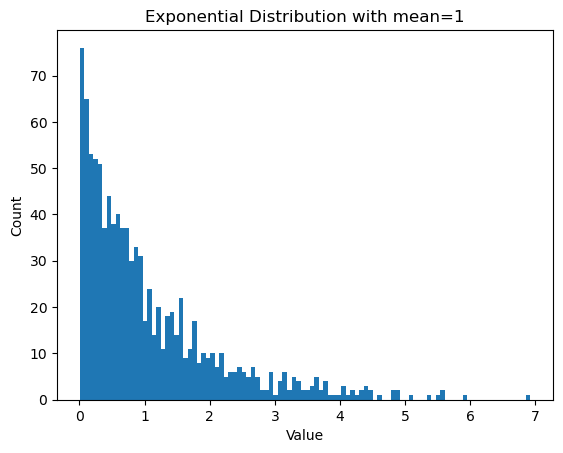

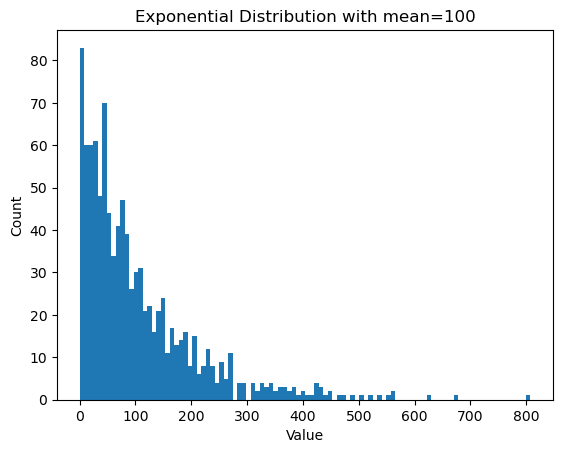

In [23]:
# your code here

def generate_exponential_numbers(mean, size):
    return np.random.exponential(scale=mean, size=size)

# Generate the random numbers
sequence1 = generate_exponential_numbers(1, 1000)
sequence2 = generate_exponential_numbers(100, 1000)

# Plot the distributions
plt.hist(sequence1, bins=100)
plt.title('Exponential Distribution with mean=1')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

plt.hist(sequence2, bins=100)
plt.title('Exponential Distribution with mean=100')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()


How are the two distributions different?

In [ ]:
# your answer here:

"""The two distributions generated by the code above are different in terms of their central tendency 
and spread. The first sequence has a mean of 1, which is much smaller than the mean of 100 for the second 
sequence. This means that the first sequence is concentrated around smaller values, while the second sequence 
is more spread out and has a wider range of values.

In terms of shape, the first sequence has a steeper drop-off and a higher peak, indicating that there are
many values clustered closely around the mean of 1. The second sequence, on the other hand, has a flatter 
shape with a longer tail, indicating that there are more values spread out across a wider range of values.

Overall, the difference in means between the two sequences leads to a clear difference in their distributions,
with the first sequence being more tightly clustered around smaller values and the second sequence being more 
spread out with a wider range of values"""


## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [25]:
# your answer here
# Hint: This is same as saying P(x<15)
import numpy as np

# Define the mean of the exponential distribution
mean = 10

# Define the value at which to evaluate the CDF
x = 15

# Calculate the CDF of the exponential distribution
cdf = 1 - np.exp(-x / mean)

# Print the result
print("The probability that a customer spends less than 15 minutes in the bank is:", cdf)


The probability that a customer spends less than 15 minutes in the bank is: 0.7768698398515702


What is the probability that the customer will spend more than 15 minutes

In [26]:
# your answer here

import numpy as np

# Define the mean of the exponential distribution
mean = 10

# Define the value at which to evaluate the CDF
x = 15

# Calculate the CDF of the exponential distribution
cdf = 1 - np.exp(-x / mean)

# Calculate the probability that the customer will spend more than 15 minutes
prob_more_than_15 = 1 - cdf

# Print the result
print("The probability that the customer will spend more than 15 minutes in the bank is:", prob_more_than_15)



The probability that the customer will spend more than 15 minutes in the bank is: 0.2231301601484298
